# Project:Investigating NICS, FBI Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

   This project is a part of my ALX-T Data Analyst Udacity Nano degree program, for this project, I am to pick one out of four dataset, i picked the FBI gun data from the FBI's National Instant Background Check System. In this project i would be analyzing the correlation between
    1) Total Population in the united states as at July 1, 2016 and the total number of guns available in the united state at the same period of time
    2) The percentage change that occured in the US population and the percentage change that also occured in the total number of guns available in The United State between April 1, 2010 and July 1, 2016.
  
 This project includes two dataset, the first dataset is the United State Census data which includes the total number of individuals living in the United State and the population percentage change that occured between April 1, 2010 and July 1,2016,  and many more related variables. the second data set is the FBI Gun Datasets which is a record on gun purchase in different part of the country, and the total number of guns available in the united states at specified periods.

  The dependent variable used in this analysis is the Population estimates, July 1, 2016,  (V2016) and the Population, percent change from April 1, 2010 to July 1, 2016 (V2016).
  
 The independent variables used include permit,percent change from April 1, 2010 to July 1, 2016 and more

<a id='wrangling'></a>
## Data Wrangling


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
us_census = pd.read_csv(r"C:\Users\Bright_Pc\Downloads\udacity project 1\U.S. Census Data.csv")
gun_data = pd.read_excel(r"C:\Users\Bright_Pc\Downloads\udacity project 1\gun_data.xlsx")

In [12]:
us_census.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",NaN,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767


In [13]:
gun_data.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303





>Both dataset contains states in the united state and for this analysis i would be using the states as a connection between both dataset



### Data Cleaning

#### US Census dataset

In [62]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [14]:
us_census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [6]:
#all the states columns have 20 null values and I would be removing the columns with null values
us_census.iloc[65:]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),"Hispanics may be of any race, so also are incl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,(c),Economic Census - Puerto Rico data are not com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
us_census1 = us_census.iloc[:65]
us_census1.tail(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


> last 20 rows which contained the null values has been removed

 dropping the fact note column, it wont be needed for the analysis

In [8]:
us_census1.drop('Fact Note', axis = 1, inplace = True)

C:\Users\Bright_Pc\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
us_census1.head(2)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767


In [11]:
us_census1.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


> The us_census data is free of null values 

Transposing the US census dataset, so a state column can be created

In [12]:
us_census2 = us_census1.transpose().reset_index()
us_census2.head(2)

,index,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,64
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
1,Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""


In [13]:
#makeing the first row the column header
us_census2.columns = us_census2.loc[0]
us_census2.head(2)

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
1,Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""


In [14]:
#dropping the first row
us_census2 = us_census2.iloc[1:].reset_index(drop = True)
us_census2.head(2)

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""


In [15]:
#renaming the fact column to state column
us_census2.rename(columns = {'Fact':'state'}, inplace = True)
us_census2.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""


for this analysis we would be needing only the first three columns, a new dataframe would be created to accommondate only the required columns

In [16]:
us_census3 = us_census2[['state', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']]

us_census3.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)"
0,Alabama,4863300,4780131,1.70%
1,Alaska,741894,710249,4.50%


In [17]:
#making changes to the population percent change column, so it can be used for calculation
us_census3[['population%change','%']] = us_census3['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'].str.split('%', expand = True)


C:\Users\Bright_Pc\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",population%change,%
0,Alabama,4863300,4780131,1.70%,1.70,
1,Alaska,741894,710249,4.50%,4.50,


In [63]:
us_census3.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)",population%change
0,Alabama,4863300.0,4780131.0,1.7
1,Alaska,741894.0,710249.0,4.5


In [18]:
#droppig columns that wont be needed
us_census3.drop(['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)','%'], axis = 1, inplace = True)

C:\Users\Bright_Pc\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)",population%change
0,Alabama,4863300,4780131,1.70
1,Alaska,741894,710249,4.50


In [64]:
us_census3.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)",population%change
0,Alabama,4863300.0,4780131.0,1.7
1,Alaska,741894.0,710249.0,4.5


In [19]:
us_census3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   state                                               50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)        50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)  50 non-null     object
 3   population%change                                   50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [20]:
#chnaging the datatype
us_census3= us_census3.astype({'Population estimates, July 1, 2016,  (V2016)':'float','Population estimates base, April 1, 2010,  (V2016)':'float','population%change':'float'}, errors = 'ignore')
us_census3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   state                                               50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)        50 non-null     float64
 2   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float64
 3   population%change                                   50 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


 ### gun data

In [65]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [22]:
gun_data.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

for this analysis we would be using some of the columns, would create a new dataframe for the needed columns.  

In [23]:
gun_data1 = gun_data[['month','state','permit','handgun','long_gun','other','totals']]
gun_data1.head(2)

,month,state,permit,handgun,long_gun,other,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,6303


create a year column for the gun dataset

In [24]:
gun_data1['year'] = pd.DatetimeIndex(gun_data1['month']).year
gun_data1.head(2)

C:\Users\BRIGHT~1\AppData\Local\Temp/ipykernel_6452/2988906732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_data1['year'] = pd.DatetimeIndex(gun_data1['month']).year


,month,state,permit,handgun,long_gun,other,totals,year
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,32019,2017
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,6303,2017


> columns needed for analysis has been separated and a year column added to the dataframe

In [25]:
us_census3.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)",population%change
0,Alabama,4863300.0,4780131.0,1.7
1,Alaska,741894.0,710249.0,4.5


#### comparing the state column for both dataset

In [26]:
len(us_census3['state'].unique())

50

In [27]:
len(gun_data1['state'].unique())

55

there are 55 states in the gun_data dataset and 50 in the census dataset, the states present in the gun dataset and not in the census dataset would be removed

for all states in both dataset, a state dataframe would be created for each dataset and compared

In [28]:
state_us_census = us_census3['state'].unique()
state_us_census

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [29]:
state_gun_data = gun_data1['state'].unique()
state_gun_data

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [30]:
for state in state_gun_data:
    if state not in state_us_census:
        print(state)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


> the above states are states present in the gun dataset and abscent in the us census dataset, the states would be removed from the gun datatset

In [31]:
gun_data2 = gun_data1.drop(gun_data1[gun_data1['state'].isin(['District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands'])].index)
gun_data2.head(2)

,month,state,permit,handgun,long_gun,other,totals,year
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,32019,2017
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,6303,2017


> both dataset states are now the same

In [32]:
gun_data2.isnull().sum()

month          0
state          0
permit         2
handgun        0
long_gun       0
other       6350
totals         0
year           0
dtype: int64

cleaning the gun dataset for null values

first, lets take a look at the kind of values available by looking at the values available for Alabama across different categories

In [43]:
(gun_data2[['month','state','totals']][gun_data2['state'] == 'Alabama']).head(9).reset_index(drop = True)

,month,state,totals
0,2017-09,Alabama,32019
1,2017-08,Alabama,35038
2,2017-07,Alabama,31474
3,2017-06,Alabama,35687
4,2017-05,Alabama,33331
5,2017-04,Alabama,32652
6,2017-03,Alabama,48769
7,2017-02,Alabama,46251
8,2017-01,Alabama,41542


looking at the total guns available in Alabama from january 2017 to september 2017, u will realize each value represent the quantity at a particular time.
that is the total guns available as at 2017 - 08 is a separate entity and not addition or subtraction of any other month(it is not derived from calculation done on other columns).

> for this, i would be filling my null values with the earliest value  above it, that is if the total number of guns in Alabama for 2017-06 was unknown, it would be replaced by the total number of guns for 2017-07

In [33]:
gun_data2.ffill(inplace = True)
gun_data2.isnull().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
other       0
totals      0
year        0
dtype: int64

> gun dataset is free of null values

In [34]:
us_census3.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)",population%change
0,Alabama,4863300.0,4780131.0,1.7
1,Alaska,741894.0,710249.0,4.5


the us census dataset contains the population of each states on july 1, 2016 and on April 1,2010 and the percentage difference between both date.
for the gun data sets, the values of each column on these same particular dates stated above would be used to calculate the percentage difference of each columns as well.

In [35]:
gun_data_2016_01 = gun_data1[['state','permit','handgun','long_gun','other','totals']].loc[gun_data1['month'] == '2016-01'].reset_index(drop = True)
gun_data_2016_01.head(2)

,state,permit,handgun,long_gun,other,totals
0,Alabama,27242.0,25445.0,14785.0,1266.0,73218
1,Alaska,192.0,2859.0,2245.0,300.0,6085


In [37]:
gun_data_2010_01 = gun_data1[['state','permit','handgun','long_gun','other','totals']][gun_data1['month'] == '2010-01'].reset_index(drop = True)
gun_data_2010_01.head(2)

,state,permit,handgun,long_gun,other,totals
0,Alabama,397.0,9404.0,10081.0,153.0,24397
1,Alaska,0.0,1532.0,1812.0,67.0,3821


rename columns to differentiate 2010 from 2016

In [38]:
gun_data_2010_01 = gun_data_2010_01.rename(columns ={'permit':'permit2010','handgun':'handgun2010','long_gun':'long_gun2010','other':'others2010','totals':'totals2010'})
gun_data_2010_01.head(2)

,state,permit2010,handgun2010,long_gun2010,others2010,totals2010
0,Alabama,397.0,9404.0,10081.0,153.0,24397
1,Alaska,0.0,1532.0,1812.0,67.0,3821


In [39]:
gun_data_2016_01 = gun_data_2016_01.rename(columns = {'permit':'permit2016','handgun':'handgun2016','long_gun':'long_gun2016','other':'other2016','totals':'totals2016'})
gun_data_2016_01.head(2)

,state,permit2016,handgun2016,long_gun2016,other2016,totals2016
0,Alabama,27242.0,25445.0,14785.0,1266.0,73218
1,Alaska,192.0,2859.0,2245.0,300.0,6085


merging both gun dataset to have a single dataframe

In [40]:
full_gun_data = gun_data_2016_01.merge(gun_data_2010_01[['state','permit2010', 'handgun2010', 'long_gun2010', 'others2010','totals2010']])
full_gun_data.head(2)

,state,permit2016,handgun2016,long_gun2016,other2016,totals2016,permit2010,handgun2010,long_gun2010,others2010,totals2010
0,Alabama,27242.0,25445.0,14785.0,1266.0,73218,397.0,9404.0,10081.0,153.0,24397
1,Alaska,192.0,2859.0,2245.0,300.0,6085,0.0,1532.0,1812.0,67.0,3821


In [41]:
full_gun_data.isnull().sum()

state           0
permit2016      0
handgun2016     0
long_gun2016    0
other2016       0
totals2016      0
permit2010      0
handgun2010     0
long_gun2010    0
others2010      0
totals2010      0
dtype: int64

> confirming there are no null values 

merging the gun dataset and the census datasets

In [42]:
us_gun_census_data = us_census3.merge(full_gun_data[['state', 'permit2016', 'handgun2016', 'long_gun2016', 'other2016','totals2016', 'permit2010', 'handgun2010', 'long_gun2010', 'others2010','totals2010']])
us_gun_census_data.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)",population%change,permit2016,handgun2016,long_gun2016,other2016,totals2016,permit2010,handgun2010,long_gun2010,others2010,totals2010
0,Alabama,4863300.0,4780131.0,1.7,27242.0,25445.0,14785.0,1266.0,73218,397.0,9404.0,10081.0,153.0,24397
1,Alaska,741894.0,710249.0,4.5,192.0,2859.0,2245.0,300.0,6085,0.0,1532.0,1812.0,67.0,3821


#### creating a percentage change table and  calculating the percentage change for required columns

In [43]:
percent_changes = us_gun_census_data[['state','population%change']]
percent_changes.head(2)

,state,population%change
0,Alabama,1.7
1,Alaska,4.5


calculate the percentage change for permit,handgun,long_gun,other and totals

In [44]:
percent_changes['permit%change'] =((us_gun_census_data['permit2016'] - us_gun_census_data['permit2010'])/us_gun_census_data['permit2010'])*100
percent_changes['handgun%change'] =((us_gun_census_data['handgun2016'] - us_gun_census_data['handgun2010'])/us_gun_census_data['handgun2010'])*100
percent_changes['long_gun%change'] =((us_gun_census_data['long_gun2016'] - us_gun_census_data['long_gun2010'])/us_gun_census_data['long_gun2010'])*100
percent_changes['other%change'] =((us_gun_census_data['other2016'] - us_gun_census_data['others2010'])/us_gun_census_data['others2010'])*100
percent_changes['totals%change'] =((us_gun_census_data['totals2016'] - us_gun_census_data['totals2010'])/us_gun_census_data['totals2010'])*100

C:\Users\BRIGHT~1\AppData\Local\Temp/ipykernel_6452/1267530115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_changes['permit%change'] =((us_gun_census_data['permit2016'] - us_gun_census_data['permit2010'])/us_gun_census_data['permit2010'])*100
C:\Users\BRIGHT~1\AppData\Local\Temp/ipykernel_6452/1267530115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_changes['handgun%change'] =((us_gun_census_data['handgun2016'] - us_gun_census_data['handgun2010'])/us_gun_census_data['handgun2010

In [45]:
percent_changes.head(2)

,state,population%change,permit%change,handgun%change,long_gun%change,other%change,totals%change
0,Alabama,1.7,6761.964736,170.576350,46.662037,727.450980,200.110669
1,Alaska,4.5,inf,86.618799,23.896247,347.761194,59.251505


The percent_changes dataframe and us_gun_census_data would be used for the exploratory analysis

## Exploratory Data Analysis

### Research Question 1  (State ranking in gun ownership as at April 1, 2010 and July 1, 2016)

For this analysis, I would be looking at how the percentage increase in total guns affected the state ranking for total number of guns available between April 1,2010 and July 1,2016

In [68]:
#Top 5 states with most guns 2010
state_with_most_guns2010 =us_gun_census_data[['state','totals2010']].sort_values("totals2010", ascending = False).head(5).reset_index(drop = True)
state_with_most_guns2010

,state,totals2010
0,Kentucky,201899
1,Texas,73787
2,California,63048
3,Illinois,58343
4,Pennsylvania,47456


> kentucky has the highest number of guns as at April 1,2010

In [69]:
#Top 5 states wih most guns 2016
state_with_most_guns2016 =us_gun_census_data[['state','totals2016']].sort_values("totals2016", ascending = False).head(5).reset_index(drop = True)
state_with_most_guns2016

,state,totals2016
0,Kentucky,302383
1,Indiana,230892
2,California,220912
3,Illinois,189400
4,Texas,164088


> kentucky still has the highest number of guns as at july 1,2016
but indiana is now the second highest followed by california.
indiana wasnt in the top 5 states with highest number of guns as at 2010
pennesylvania is no longer part of the top highest states with guns

In [70]:
#Top 5 states with highest Gun ownership percentage change
state_with_most_guns_growth =percent_changes[['state','totals%change']].sort_values("totals%change", ascending = False).head(5).reset_index(drop = True)
state_with_most_guns_growth

,state,totals%change
0,Indiana,749.086162
1,California,250.387007
2,Illinois,224.631918
3,Wisconsin,210.672216
4,Alabama,200.110669


> between April 1, 2010 and July 1, 2016 indiana had the highest gun percentage growth among all states and became the second states with the highest number of guns.
Alabama and Wisconsin although not among the top 5 states with guns, are having high growth rates 

Graphical representation of the tables above

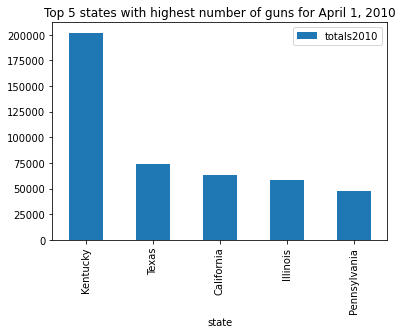

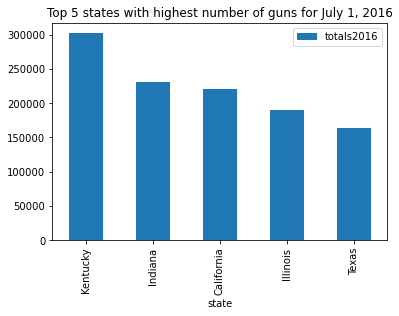

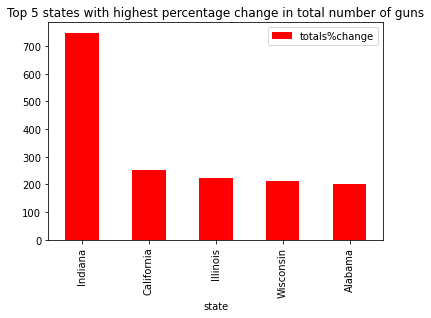

In [74]:
state_with_most_guns2010.plot(x='state', y='totals2010', kind='bar').set_title('Top 5 states with highest number of guns for April 1, 2010')
state_with_most_guns2016.plot(x='state', y='totals2016', kind='bar').set_title('Top 5 states with highest number of guns for July 1, 2016')
state_with_most_guns_growth.plot(x='state', y='totals%change', kind='bar', color = 'red').set_title('Top 5 states with highest percentage change in total number of guns')

plt.show()

We have seen how the percentage change in total number of guns affected the top 5 states, lets see how it has also affected the bottom 5 states

In [75]:
#Top 5 states with least guns 2010
state_with_least_guns2010 =us_gun_census_data[['state','totals2010']].sort_values("totals2010", ascending = True).head(5).reset_index(drop = True)
state_with_least_guns2010

,state,totals2010
0,Hawaii,826
1,Rhode Island,1270
2,Vermont,1495
3,Delaware,1638
4,North Dakota,3064


> Hawaii had the least number of guns as at April 1,2010 

In [76]:
#Top 5 states with least guns 2016
state_with_least_guns2016 =us_gun_census_data[['state','totals2016']].sort_values("totals2016", ascending = True).head(5).reset_index(drop = True)
state_with_least_guns2016

,state,totals2016
0,Hawaii,1383
1,Rhode Island,2617
2,Vermont,3451
3,Delaware,4886
4,Wyoming,5676


> Hawaii still had the lowest total number of guns as at July 1,2016,
among the top 5 states with least guns, North Darkota was replaced by Wyoming

Top 5 states with least guns percentage growth

In [77]:
state_with_least_guns_growth =percent_changes[['state','totals%change']].sort_values("totals%change", ascending = True).head(5).reset_index(drop = True)
state_with_least_guns_growth

,state,totals%change
0,Utah,-52.682464
1,Kentucky,49.769439
2,Arkansas,51.317933
3,New Mexico,57.784469
4,Montana,58.351794


> utah has a negative gun percentage growth, which implies the total number of guns in utah as at April 1, 2010 is more than the total number of guns in utah as at July 1, 2016, 
>kentucky which is the states with the highest gun now has a lowest growth rate after uttah

Graphical representation of the tables above

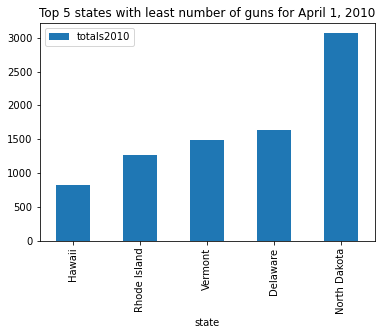

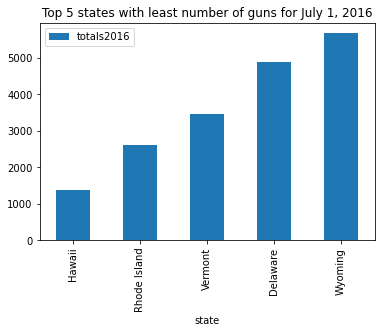

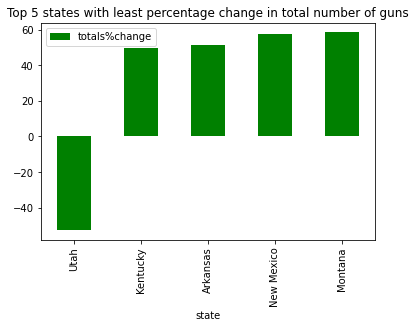

In [78]:
state_with_least_guns2010.plot(x='state', y='totals2010', kind='bar').set_title('Top 5 states with least number of guns for April 1, 2010')
state_with_least_guns2016.plot(x='state', y='totals2016', kind='bar').set_title('Top 5 states with least number of guns for July 1, 2016')
state_with_least_guns_growth.plot(x='state', y='totals%change', kind='bar', color = 'green').set_title('Top 5 states with least percentage change in total number of guns')

plt.show()

### Research Question 2  (correlation between Population and total guns available for July 1,2016)

For this analysis we would be looking at if and how population size affects the total number of guns, permits, handgun, long_gun and other guns available in the united states, that is if there is a correlation between population size and gun variables and how it affects the variables.

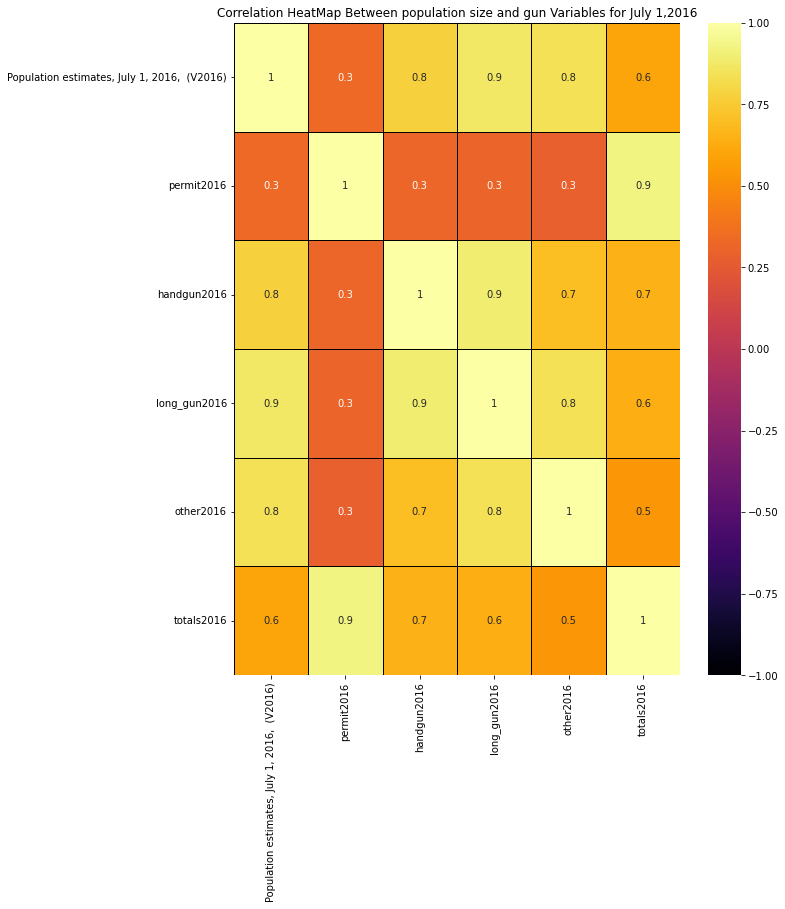

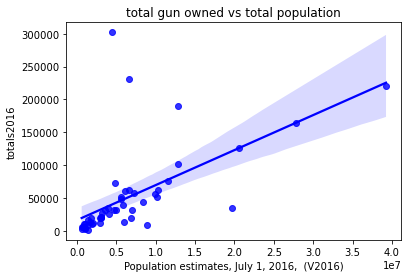

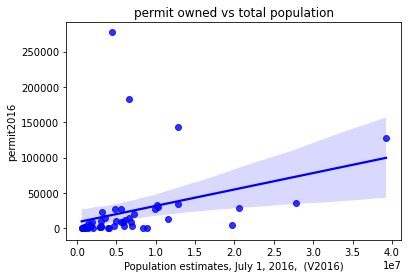

In [79]:
corr_df = us_gun_census_data.drop(['Population estimates base, April 1, 2010,  (V2016)','permit2010','handgun2010','long_gun2010','others2010','totals2010','population%change'], axis = 1).corr(method = "pearson")
plt.figure(figsize=(10,12))
heatmap = sns.heatmap(corr_df,annot = True, fmt = ".1g",vmin = -1, vmax = 1,center = 0, cmap = "inferno",linewidths = 1, linecolor = "black")
heatmap.set_title("Correlation HeatMap Between population size and gun Variables for July 1,2016")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

plt.figure(figsize=(6,4))
sns.regplot(data = us_gun_census_data, x = "Population estimates, July 1, 2016,  (V2016)", y= "totals2016", color = "b").set(title = "total gun owned vs total population")
plt.figure(figsize=(6,4))
sns.regplot(data = us_gun_census_data, x = "Population estimates, July 1, 2016,  (V2016)", y= "permit2016", color = "b").set(title = "permit owned vs total population")


plt.show()

> based on the data available, there seems to be  correlation between the population size and the total number of guns available in the united states as at July 1, 2016.
the linear regression graph also reveals the correlation between total guns available and the population available as well,  where the population is larger there is a probability of high number of guns available as well

### Research Question 3  (correlation between population % changes and gun ownership % changes)

C:\Users\Bright_Pc\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


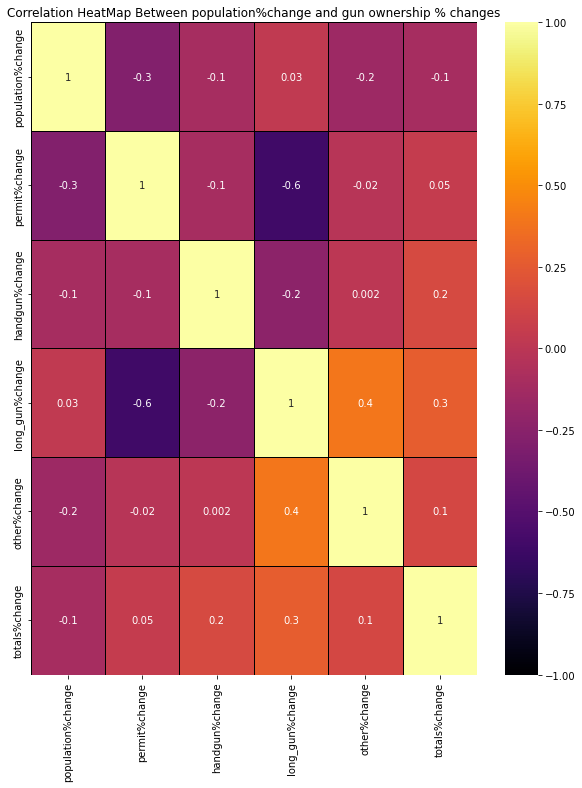

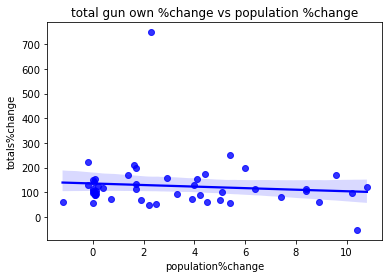

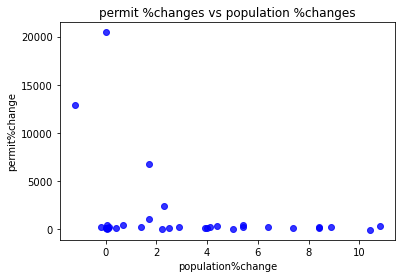

In [79]:
corr_df = percent_changes.corr(method = "pearson")
plt.figure(figsize=(10,12))
heatmap = sns.heatmap(corr_df,annot = True, fmt = ".1g",vmin = -1, vmax = 1,center = 0, cmap = "inferno",linewidths = 1, linecolor = "black")
heatmap.set_title("Correlation HeatMap Between population%change and gun ownership % changes")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

plt.figure(figsize=(6,4))
sns.regplot(data = percent_changes, x = "population%change", y= "totals%change", color = "b").set(title = "total gun own %change vs population %change")
plt.figure(figsize=(6,4))
sns.regplot(data = percent_changes, x = "population%change", y= "permit%change", color = "b").set(title = "permit %changes vs population %changes")

plt.show()


> based on the heatmap, the population percentage changes have no correlation for guns percentage changes that occured in the united state between April 1,2010 and july 1,2016.
> and the linear map shows that both populations with higher percentage changes and lower percentage changes have varying value of guns percentage changes.
This would imply that the population percentage change between April 1,2010 and July 1, 2016 has no correlation with the guns percentage changes for the same period

<a id='conclusions'></a>
## Conclusions

> Citizens were more likely to get a permit for a hand gun and other gun type than they would when they have a long gun

> long gun has a higher percentage change between April 2010 to July 2016, slightly went higher than the others when compared to the total guns owned
> In most cases as at July 1, 2016 the higher the population the more guns and permit would be available

### How are the states faring with gun increase
>indiana has the highest gun increase rate.

> kentucky had the highest number of guns as at April 1, 2010 to July 1, 2016, but also had the lowest percent increase,
while indiana wasnt in the top 5 states with guns as at april 1, 2010 but with a 749% gun increase and just 2.3% population increase it went on to become the second state with highest number of guns

>utah went from being 7th highest state with guns as at April 1, 2010 to being 31st position with -7% permit increase and 10% population increase.

>population growth doesnt have a correlation with gun growth

## Limitations

> missing data among the dataset